<a href="https://colab.research.google.com/github/abhishekhajuria/Algorithmic-Trading-Stock-Price-Model/blob/main/Algorithmic_Trading_Stock_Price_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
df = yf.download('WIPRO.NS')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,1.1250,1.1250,1.1250,1.1250,0.910127,19999
1996-01-02,1.0375,1.0375,1.0375,1.0375,0.839340,39999
1996-01-03,1.0750,1.0750,1.0750,1.0750,0.869677,19999
1996-01-04,1.0750,1.0750,1.0750,1.0750,0.869677,119999
1996-01-05,1.0750,1.0750,1.0750,1.0750,0.869677,0


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-11,418.649994,422.149994,412.350006,413.049988,413.049988,3785734
2023-08-14,413.250000,416.200012,409.500000,415.149994,415.149994,2896090
2023-08-16,414.149994,420.200012,414.000000,418.649994,418.649994,4065890
2023-08-17,418.649994,420.399994,414.500000,417.549988,417.549988,3170480
2023-08-18,415.049988,416.350006,408.000000,411.700012,411.700012,5299326


In [6]:
pip install tensorflow

In [7]:
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

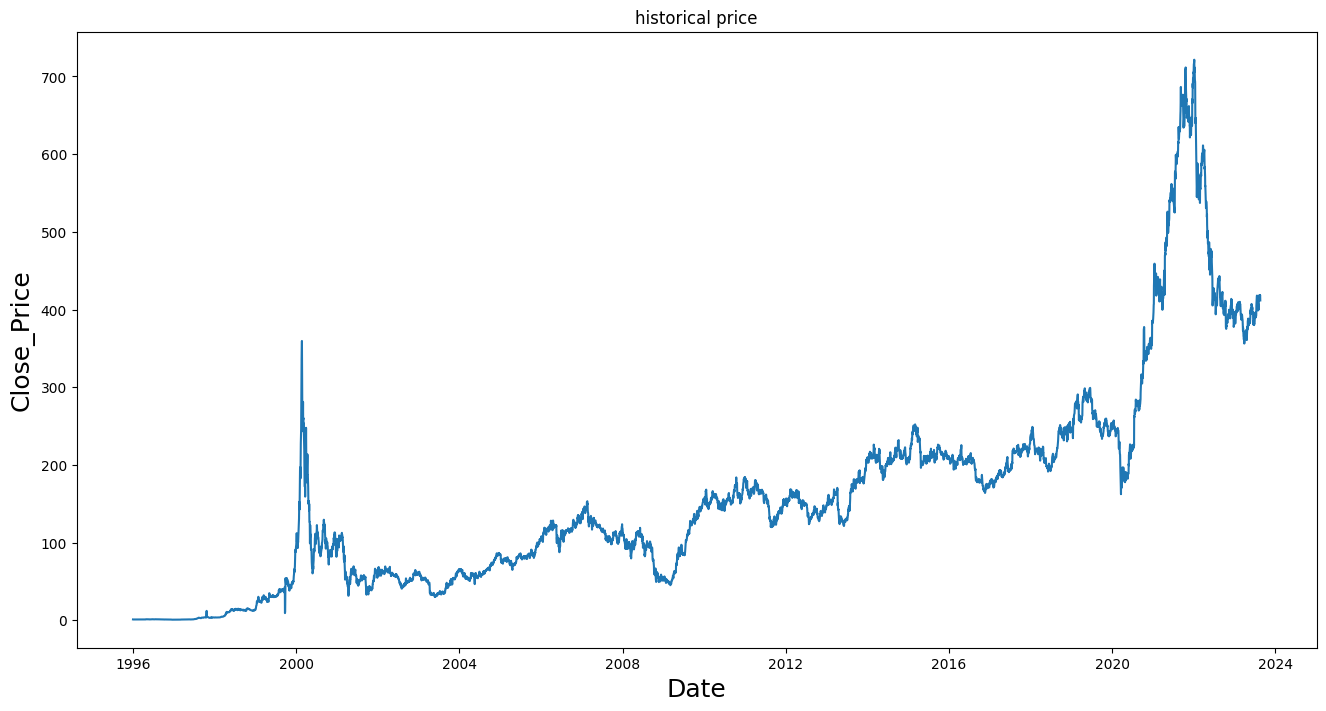

In [17]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [18]:
data = df.filter(['Close'])
df = np.array(data).reshape(-1,1)
df

array([[  1.125     ],
       [  1.03750002],
       [  1.07500005],
       ...,
       [418.6499939 ],
       [417.54998779],
       [411.70001221]])

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))
scaled_df

array([[4.96023166e-04],
       [3.74618934e-04],
       [4.26649366e-04],
       ...,
       [5.79802484e-01],
       [5.78276251e-01],
       [5.70159542e-01]])

In [20]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5560

In [21]:
train_data = scaled_df[0:training_data_len , :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00049602, 0.00037462, 0.00042665, 0.00042665, 0.00042665,
       0.00042665, 0.00042665, 0.00042873, 0.00042665, 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00041971, 0.00039196,
       0.00041971, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.00039196, 0.00038   , 0.00038   , 0.00038   , 0.00042665,
       0.00042665, 0.00039196, 0.00039196, 0.00039196, 0.00039196,
       0.0004263 , 0.0004263 , 0.0004263 , 0.0004263 , 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00044399, 0.00049602, 0.00049602, 0.00049602,
       0.00049602, 0.00049602, 0.00049602, 0.00049602, 0.00048735,
       0.00048735, 0.00049602, 0.00039214, 0.00039214, 0.00041277,
       0.00046134, 0.00046151, 0.00046151, 0.00046151, 0.00046151])]
[0.00046150960565661376]



In [22]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5500, 60, 1)

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size=40, epochs=8)

Epoch 1/8
138/138 [==============================] - 16s 75ms/step - loss: 1.2404e-04
Epoch 2/8
138/138 [==============================] - 9s 69ms/step - loss: 6.5846e-05
Epoch 3/8
138/138 [==============================] - 10s 71ms/step - loss: 6.7791e-05
Epoch 4/8
138/138 [==============================] - 10s 75ms/step - loss: 5.7232e-05
Epoch 5/8
138/138 [==============================] - 12s 86ms/step - loss: 6.0315e-05
Epoch 6/8
138/138 [==============================] - 10s 73ms/step - loss: 5.0964e-05
Epoch 7/8
138/138 [==============================] - 10s 69ms/step - loss: 5.2703e-05
Epoch 8/8
138/138 [==============================] - 10s 75ms/step - loss: 4.4596e-05


In [26]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [27]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [28]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

44/44 [==============================] - 4s 36ms/step


3.7426180636994353

<ipython-input-29-aaab4043364c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['predictions'] = predictions


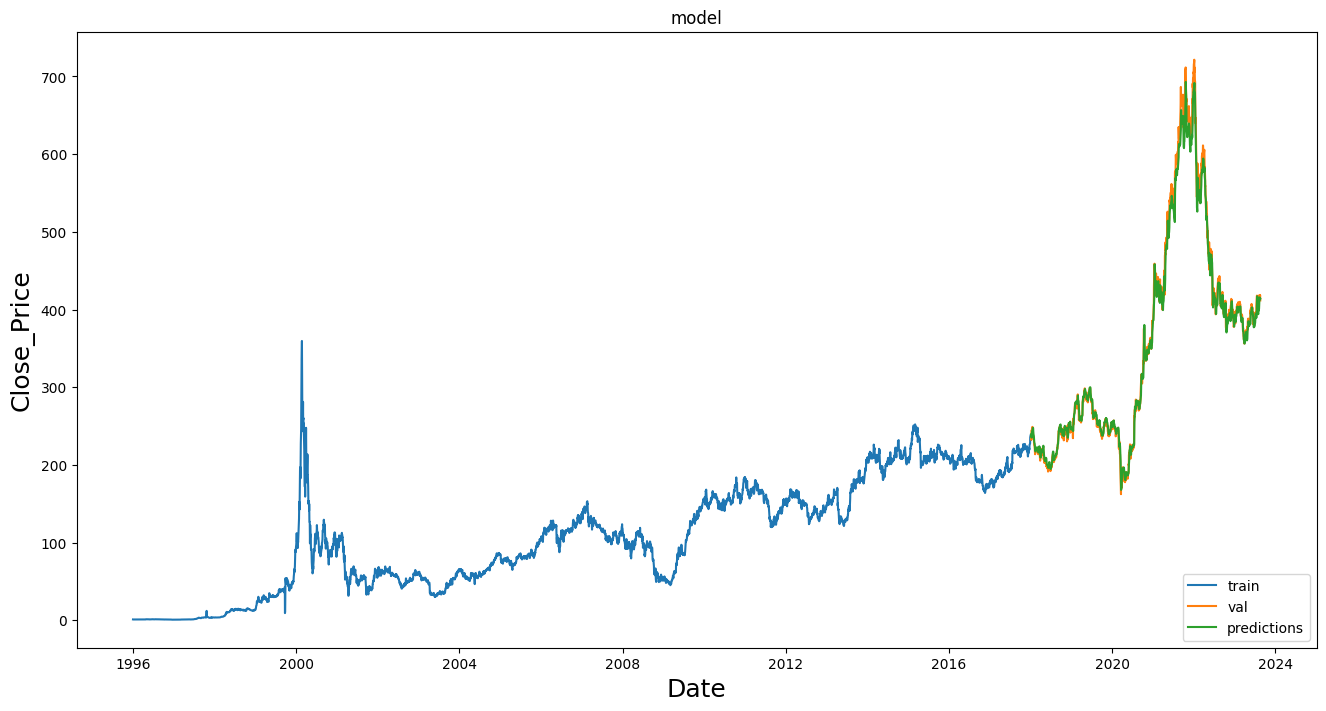

In [29]:
train = data[:training_data_len]
val = data[training_data_len:]
val['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close','predictions']],)
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.show()

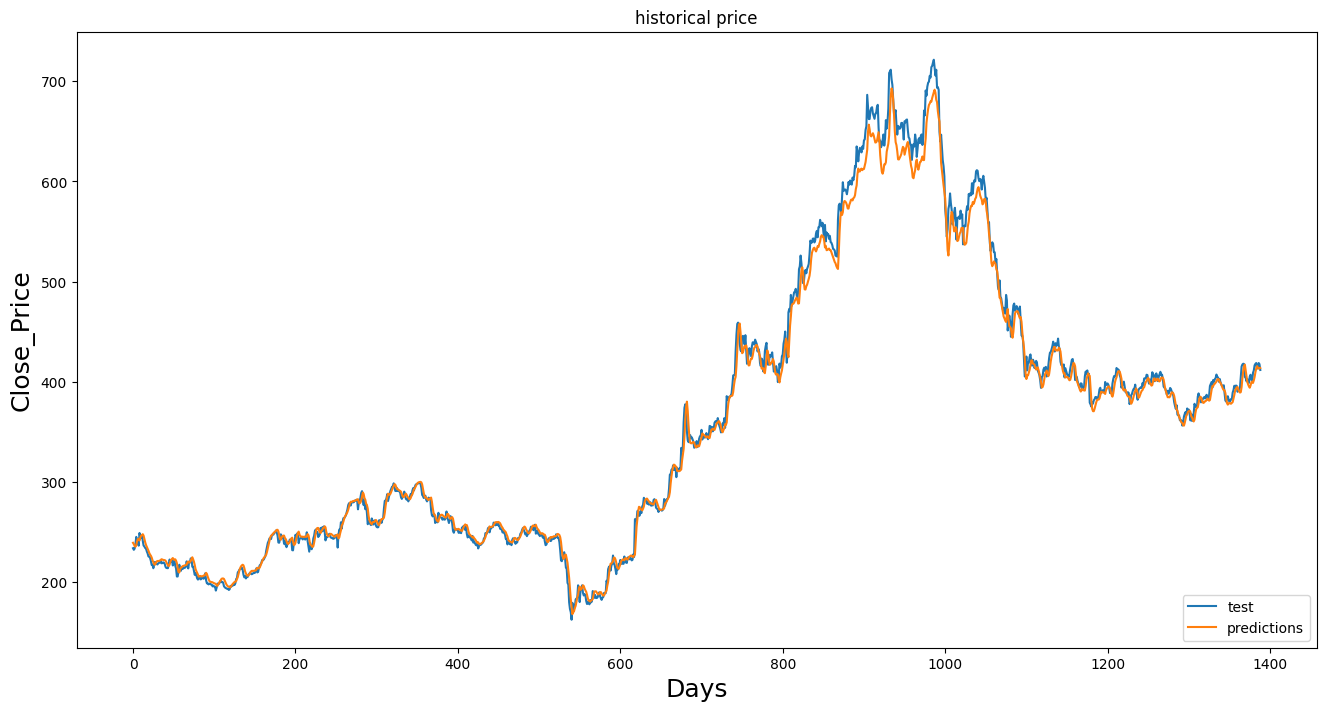

In [30]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()